working version


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
data_dir = 'archive/CEDAR/CEDAR'  # Path to the CEDAR directory
X = []
y = []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        for image_file in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, image_file)
            print("Image Path:", image_path)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error reading image: {image_path}")
                continue
            image = cv2.resize(image, (128, 128))  # Resize images to a common size
            X.append(image)
            y.append(int('genuine' in image_file))  # 1 for genuine, 0 for forged

if len(X) == 0:
    print("No images loaded. Check the directory structure and paths.")
else:
    X = np.array(X).reshape(-1, 128, 128, 1)  # Reshape for CNN input
    y = np.array(y)

    print("Number of images loaded:", len(X))

    # Split dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Number of training samples:", len(X_train))
    print("Number of validation samples:", len(X_val))

    # Continue with model architecture, training, and evaluation...

X = np.array(X).reshape(-1, 128, 128, 1)  # Reshape for CNN input
y = np.array(y)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Model Architecture
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Step 3: Model Training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


# Step 4: Model Evaluation
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')





C:\Users\sindhiya maria\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Image Path: archive/CEDAR/CEDAR\1\forgeries_1_1.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_10.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_11.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_12.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_13.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_14.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_15.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_16.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_17.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_18.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_19.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_2.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_20.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_21.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_22.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_23.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_24.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_3.png
Image Path: archive/CEDAR/CEDAR\1\forgeries_1_4.p

Image Path: archive/CEDAR/CEDAR\12\forgeries_12_6.png
Image Path: archive/CEDAR/CEDAR\12\forgeries_12_7.png
Image Path: archive/CEDAR/CEDAR\12\forgeries_12_8.png
Image Path: archive/CEDAR/CEDAR\12\forgeries_12_9.png
Image Path: archive/CEDAR/CEDAR\12\original_12_1.png
Image Path: archive/CEDAR/CEDAR\12\original_12_10.png
Image Path: archive/CEDAR/CEDAR\12\original_12_11.png
Image Path: archive/CEDAR/CEDAR\12\original_12_12.png
Image Path: archive/CEDAR/CEDAR\12\original_12_13.png
Image Path: archive/CEDAR/CEDAR\12\original_12_14.png
Image Path: archive/CEDAR/CEDAR\12\original_12_15.png
Image Path: archive/CEDAR/CEDAR\12\original_12_16.png
Image Path: archive/CEDAR/CEDAR\12\original_12_17.png
Image Path: archive/CEDAR/CEDAR\12\original_12_18.png
Image Path: archive/CEDAR/CEDAR\12\original_12_19.png
Image Path: archive/CEDAR/CEDAR\12\original_12_2.png
Image Path: archive/CEDAR/CEDAR\12\original_12_20.png
Image Path: archive/CEDAR/CEDAR\12\original_12_21.png
Image Path: archive/CEDAR/CEDA

Image Path: archive/CEDAR/CEDAR\16\forgeries_16_3.png
Image Path: archive/CEDAR/CEDAR\16\forgeries_16_4.png
Image Path: archive/CEDAR/CEDAR\16\forgeries_16_5.png
Image Path: archive/CEDAR/CEDAR\16\forgeries_16_6.png
Image Path: archive/CEDAR/CEDAR\16\forgeries_16_7.png
Image Path: archive/CEDAR/CEDAR\16\forgeries_16_8.png
Image Path: archive/CEDAR/CEDAR\16\forgeries_16_9.png
Image Path: archive/CEDAR/CEDAR\16\original_16_1.png
Image Path: archive/CEDAR/CEDAR\16\original_16_10.png
Image Path: archive/CEDAR/CEDAR\16\original_16_11.png
Image Path: archive/CEDAR/CEDAR\16\original_16_12.png
Image Path: archive/CEDAR/CEDAR\16\original_16_13.png
Image Path: archive/CEDAR/CEDAR\16\original_16_14.png
Image Path: archive/CEDAR/CEDAR\16\original_16_15.png
Image Path: archive/CEDAR/CEDAR\16\original_16_16.png
Image Path: archive/CEDAR/CEDAR\16\original_16_17.png
Image Path: archive/CEDAR/CEDAR\16\original_16_18.png
Image Path: archive/CEDAR/CEDAR\16\original_16_19.png
Image Path: archive/CEDAR/CED

Image Path: archive/CEDAR/CEDAR\19\original_19_3.png
Image Path: archive/CEDAR/CEDAR\19\original_19_4.png
Image Path: archive/CEDAR/CEDAR\19\original_19_5.png
Image Path: archive/CEDAR/CEDAR\19\original_19_6.png
Image Path: archive/CEDAR/CEDAR\19\original_19_7.png
Image Path: archive/CEDAR/CEDAR\19\original_19_8.png
Image Path: archive/CEDAR/CEDAR\19\original_19_9.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_1.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_10.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_11.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_12.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_13.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_14.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_15.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_16.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_17.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_18.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_19.png
Image Path: archive/CEDAR/CEDAR\2\forgeries_2_2

Image Path: archive/CEDAR/CEDAR\23\forgeries_23_12.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_13.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_14.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_15.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_16.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_17.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_18.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_19.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_2.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_20.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_21.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_22.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_23.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_24.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_3.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_4.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_5.png
Image Path: archive/CEDAR/CEDAR\23\forgeries_23_6.png
Image Path: arc

Image Path: archive/CEDAR/CEDAR\27\forgeries_27_15.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_16.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_17.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_18.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_19.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_2.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_20.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_21.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_22.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_23.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_24.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_3.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_4.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_5.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_6.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_7.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_8.png
Image Path: archive/CEDAR/CEDAR\27\forgeries_27_9.png
Image Path: archiv

Image Path: archive/CEDAR/CEDAR\3\original_3_12.png
Image Path: archive/CEDAR/CEDAR\3\original_3_13.png
Image Path: archive/CEDAR/CEDAR\3\original_3_14.png
Image Path: archive/CEDAR/CEDAR\3\original_3_15.png
Image Path: archive/CEDAR/CEDAR\3\original_3_16.png
Image Path: archive/CEDAR/CEDAR\3\original_3_17.png
Image Path: archive/CEDAR/CEDAR\3\original_3_18.png
Image Path: archive/CEDAR/CEDAR\3\original_3_19.png
Image Path: archive/CEDAR/CEDAR\3\original_3_2.png
Image Path: archive/CEDAR/CEDAR\3\original_3_20.png
Image Path: archive/CEDAR/CEDAR\3\original_3_21.png
Image Path: archive/CEDAR/CEDAR\3\original_3_22.png
Image Path: archive/CEDAR/CEDAR\3\original_3_23.png
Image Path: archive/CEDAR/CEDAR\3\original_3_24.png
Image Path: archive/CEDAR/CEDAR\3\original_3_3.png
Image Path: archive/CEDAR/CEDAR\3\original_3_4.png
Image Path: archive/CEDAR/CEDAR\3\original_3_5.png
Image Path: archive/CEDAR/CEDAR\3\original_3_6.png
Image Path: archive/CEDAR/CEDAR\3\original_3_7.png
Image Path: archiv

Image Path: archive/CEDAR/CEDAR\32\original_32_9.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_1.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_10.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_11.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_12.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_13.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_14.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_15.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_16.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_17.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_18.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_19.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_2.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_20.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_21.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_22.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_23.png
Image Path: archive/CEDAR/CEDAR\33\forgeries_33_24.png
Image Path: ar

Image Path: archive/CEDAR/CEDAR\36\original_36_16.png
Image Path: archive/CEDAR/CEDAR\36\original_36_17.png
Image Path: archive/CEDAR/CEDAR\36\original_36_18.png
Image Path: archive/CEDAR/CEDAR\36\original_36_19.png
Image Path: archive/CEDAR/CEDAR\36\original_36_2.png
Image Path: archive/CEDAR/CEDAR\36\original_36_20.png
Image Path: archive/CEDAR/CEDAR\36\original_36_21.png
Image Path: archive/CEDAR/CEDAR\36\original_36_22.png
Image Path: archive/CEDAR/CEDAR\36\original_36_23.png
Image Path: archive/CEDAR/CEDAR\36\original_36_24.png
Image Path: archive/CEDAR/CEDAR\36\original_36_3.png
Image Path: archive/CEDAR/CEDAR\36\original_36_4.png
Image Path: archive/CEDAR/CEDAR\36\original_36_5.png
Image Path: archive/CEDAR/CEDAR\36\original_36_6.png
Image Path: archive/CEDAR/CEDAR\36\original_36_7.png
Image Path: archive/CEDAR/CEDAR\36\original_36_8.png
Image Path: archive/CEDAR/CEDAR\36\original_36_9.png
Image Path: archive/CEDAR/CEDAR\37\forgeries_37_1.png
Image Path: archive/CEDAR/CEDAR\37\f

Image Path: archive/CEDAR/CEDAR\4\forgeries_4_24.png
Image Path: archive/CEDAR/CEDAR\4\forgeries_4_3.png
Image Path: archive/CEDAR/CEDAR\4\forgeries_4_4.png
Image Path: archive/CEDAR/CEDAR\4\forgeries_4_5.png
Image Path: archive/CEDAR/CEDAR\4\forgeries_4_6.png
Image Path: archive/CEDAR/CEDAR\4\forgeries_4_7.png
Image Path: archive/CEDAR/CEDAR\4\forgeries_4_8.png
Image Path: archive/CEDAR/CEDAR\4\forgeries_4_9.png
Image Path: archive/CEDAR/CEDAR\4\original_4_1.png
Image Path: archive/CEDAR/CEDAR\4\original_4_10.png
Image Path: archive/CEDAR/CEDAR\4\original_4_11.png
Image Path: archive/CEDAR/CEDAR\4\original_4_12.png
Image Path: archive/CEDAR/CEDAR\4\original_4_13.png
Image Path: archive/CEDAR/CEDAR\4\original_4_14.png
Image Path: archive/CEDAR/CEDAR\4\original_4_15.png
Image Path: archive/CEDAR/CEDAR\4\original_4_16.png
Image Path: archive/CEDAR/CEDAR\4\original_4_17.png
Image Path: archive/CEDAR/CEDAR\4\original_4_18.png
Image Path: archive/CEDAR/CEDAR\4\original_4_19.png
Image Path: 

Image Path: archive/CEDAR/CEDAR\43\forgeries_43_24.png
Image Path: archive/CEDAR/CEDAR\43\forgeries_43_3.png
Image Path: archive/CEDAR/CEDAR\43\forgeries_43_4.png
Image Path: archive/CEDAR/CEDAR\43\forgeries_43_5.png
Image Path: archive/CEDAR/CEDAR\43\forgeries_43_6.png
Image Path: archive/CEDAR/CEDAR\43\forgeries_43_7.png
Image Path: archive/CEDAR/CEDAR\43\forgeries_43_8.png
Image Path: archive/CEDAR/CEDAR\43\forgeries_43_9.png
Image Path: archive/CEDAR/CEDAR\43\original_43_1.png
Image Path: archive/CEDAR/CEDAR\43\original_43_10.png
Image Path: archive/CEDAR/CEDAR\43\original_43_11.png
Image Path: archive/CEDAR/CEDAR\43\original_43_12.png
Image Path: archive/CEDAR/CEDAR\43\original_43_13.png
Image Path: archive/CEDAR/CEDAR\43\original_43_14.png
Image Path: archive/CEDAR/CEDAR\43\original_43_15.png
Image Path: archive/CEDAR/CEDAR\43\original_43_16.png
Image Path: archive/CEDAR/CEDAR\43\original_43_17.png
Image Path: archive/CEDAR/CEDAR\43\original_43_18.png
Image Path: archive/CEDAR/CE

Image Path: archive/CEDAR/CEDAR\47\original_47_15.png
Image Path: archive/CEDAR/CEDAR\47\original_47_16.png
Image Path: archive/CEDAR/CEDAR\47\original_47_17.png
Image Path: archive/CEDAR/CEDAR\47\original_47_18.png
Image Path: archive/CEDAR/CEDAR\47\original_47_19.png
Image Path: archive/CEDAR/CEDAR\47\original_47_2.png
Image Path: archive/CEDAR/CEDAR\47\original_47_20.png
Image Path: archive/CEDAR/CEDAR\47\original_47_21.png
Image Path: archive/CEDAR/CEDAR\47\original_47_22.png
Image Path: archive/CEDAR/CEDAR\47\original_47_23.png
Image Path: archive/CEDAR/CEDAR\47\original_47_24.png
Image Path: archive/CEDAR/CEDAR\47\original_47_3.png
Image Path: archive/CEDAR/CEDAR\47\original_47_4.png
Image Path: archive/CEDAR/CEDAR\47\original_47_5.png
Image Path: archive/CEDAR/CEDAR\47\original_47_6.png
Image Path: archive/CEDAR/CEDAR\47\original_47_7.png
Image Path: archive/CEDAR/CEDAR\47\original_47_8.png
Image Path: archive/CEDAR/CEDAR\47\original_47_9.png
Image Path: archive/CEDAR/CEDAR\48\f

Image Path: archive/CEDAR/CEDAR\5\original_5_6.png
Image Path: archive/CEDAR/CEDAR\5\original_5_7.png
Image Path: archive/CEDAR/CEDAR\5\original_5_8.png
Image Path: archive/CEDAR/CEDAR\5\original_5_9.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_1.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_10.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_11.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_12.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_13.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_14.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_15.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_16.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_17.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_18.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_19.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_2.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_20.png
Image Path: archive/CEDAR/CEDAR\50\forgeries_50_21.png
Image Path: archive/CEDAR/CE

Image Path: archive/CEDAR/CEDAR\53\original_53_1.png
Image Path: archive/CEDAR/CEDAR\53\original_53_10.png
Image Path: archive/CEDAR/CEDAR\53\original_53_11.png
Image Path: archive/CEDAR/CEDAR\53\original_53_12.png
Image Path: archive/CEDAR/CEDAR\53\original_53_13.png
Image Path: archive/CEDAR/CEDAR\53\original_53_14.png
Image Path: archive/CEDAR/CEDAR\53\original_53_15.png
Image Path: archive/CEDAR/CEDAR\53\original_53_16.png
Image Path: archive/CEDAR/CEDAR\53\original_53_17.png
Image Path: archive/CEDAR/CEDAR\53\original_53_18.png
Image Path: archive/CEDAR/CEDAR\53\original_53_19.png
Image Path: archive/CEDAR/CEDAR\53\original_53_2.png
Image Path: archive/CEDAR/CEDAR\53\original_53_20.png
Image Path: archive/CEDAR/CEDAR\53\original_53_21.png
Image Path: archive/CEDAR/CEDAR\53\original_53_22.png
Image Path: archive/CEDAR/CEDAR\53\original_53_23.png
Image Path: archive/CEDAR/CEDAR\53\original_53_24.png
Image Path: archive/CEDAR/CEDAR\53\original_53_3.png
Image Path: archive/CEDAR/CEDAR

Image Path: archive/CEDAR/CEDAR\6\original_6_23.png
Image Path: archive/CEDAR/CEDAR\6\original_6_24.png
Image Path: archive/CEDAR/CEDAR\6\original_6_3.png
Image Path: archive/CEDAR/CEDAR\6\original_6_4.png
Image Path: archive/CEDAR/CEDAR\6\original_6_5.png
Image Path: archive/CEDAR/CEDAR\6\original_6_6.png
Image Path: archive/CEDAR/CEDAR\6\original_6_7.png
Image Path: archive/CEDAR/CEDAR\6\original_6_8.png
Image Path: archive/CEDAR/CEDAR\6\original_6_9.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_1.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_10.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_11.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_12.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_13.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_14.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_15.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_16.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_17.png
Image Path: archive/CEDAR/CEDAR\7\forgeries_7_18.png
Image Path

C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 0.9285 - loss: 0.4530 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - ac

# In the provided code, the following steps are performed:

Loading Dataset:
The code starts by defining the directory containing the CEDAR dataset (archive/CEDAR/CEDAR).
It iterates over subdirectories within the dataset directory to load each image file.
Each image is read using OpenCV (cv2.imread) and resized to a common size of 128x128 pixels.
For each image, the label is determined based on the presence of the substring 'genuine' in the filename, where 1 represents genuine and 0 represents forged.

# Data Processing:
After loading the images and labels, they are converted into numpy arrays (X and y).
The images are reshaped into the format suitable for CNN input ((-1, 128, 128, 1)), where -1 indicates the number of samples.
The dataset is split into training and validation sets using train_test_split from sklearn.model_selection.

# Model Architecture:
A simple Convolutional Neural Network (CNN) model is defined using the Sequential API from Keras.
The model consists of three convolutional layers followed by max-pooling layers, a flatten layer, and two dense layers.
ReLU activation is used for the convolutional and dense layers, except for the output layer which uses sigmoid activation for binary classification.

# Model Compilation:
The model is compiled using the Adam optimizer with default parameters, binary cross-entropy loss function, and accuracy metric.

# Model Training:
The model is trained using the training data (X_train, y_train) for 10 epochs with a batch size of 32.
Validation data (X_val, y_val) is provided to monitor the performance of the model during training.

# Model Evaluation:
After training, the model is evaluated on the validation set to calculate the loss and accuracy.
The validation loss and accuracy are printed to assess the model's performance.
The output indicates that the model achieves perfect accuracy (1.0) on both the training and validation sets, which could indicate potential overfitting, especially if the dataset is small. Further analysis, such as examining learning curves and validation performance on unseen data, would be necessary to ensure the model's generalization ability

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

# Load dataset
data_dir = 'archive/CEDAR/CEDAR'  # Path to the CEDAR directory
X1 = []
X2 = []
y = []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        image_paths = []
        for image_file in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error reading image: {image_path}")
                continue
            image = cv2.resize(image, (128, 128))  # Resize images to a common size
            if len(image_paths) == 0:
                X1.append(image)
            elif len(image_paths) == 1:
                X2.append(image)
            else:
                break
            image_paths.append(image_path)
        if len(image_paths) == 2:
            y.append(int('genuine' in subdir))  # 1 for genuine, 0 for forged

if len(X1) == 0 or len(X2) == 0 or len(y) == 0:
    print("No pairs of images loaded. Check the directory structure and paths.")
else:
    print("Number of pairs loaded:", len(X1))
    y = np.array(y)

    # Convert lists to numpy arrays
    X1 = np.array(X1).reshape(-1, 128, 128, 1)  # Reshape for CNN input
    X2 = np.array(X2).reshape(-1, 128, 128, 1)  # Reshape for CNN input

    # Split dataset into training and validation sets
    X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(X1, X2, y, test_size=0.2, random_state=42)

    print("Number of training samples:", len(X1_train))
    print("Number of validation samples:", len(X1_val))

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Regularization
    base_model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu')
    ])

    # Process each input image with the base model
    processed1 = base_model(input1)
    processed2 = base_model(input2)

    # Calculate similarity/difference between processed features
    concatenated_features = Concatenate()([processed1, processed2])
    output = Dense(1, activation='sigmoid')(concatenated_features)

    # Create model
    model = Model(inputs=[input1, input2], outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X1_train):
        X1_train_fold, X1_val_fold = X1_train[train_index], X1_train[val_index]
        X2_train_fold, X2_val_fold = X2_train[train_index], X2_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit([X1_train_fold, X2_train_fold], y_train_fold, epochs=10, batch_size=32, validation_data=([X1_val_fold, X2_val_fold], y_val_fold))

    # Evaluate the model
    loss, accuracy = model.evaluate([X1_val, X2_val], y_val)
    print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')
    
    
    
    


Number of pairs loaded: 55
Number of training samples: 44
Number of validation samples: 11
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.8232 - loss: 1.4428 - val_accuracy: 1.0000 - val_loss: 0.1240
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.1239 - val_accuracy: 1.0000 - val_loss: 0.1190
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.1189 - val_accuracy: 1.0000 - val_loss: 0.1143
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 1.0000 - loss: 0.1142 - val_accuracy: 1.0000 - val_loss: 0.1099
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 1.0000 - loss: 0.1098 - val_accuracy: 1.0000 - val_loss: 0.1057
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.1056 - val_accuracy: 1.0000 - val_loss: 0.1018
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 0.1017 - val_accuracy: 1.0000 - val_loss: 0.0982
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━

Loading Dataset:
The code loads pairs of images from the CEDAR dataset directory, where each pair consists of two images (genuine and forged).
It creates two lists X1 and X2 to store the two images of each pair, and a list y to store the corresponding labels (1 for genuine, 0 for forged).

Data Processing:
Images are resized to a common size of 128x128 pixels and appended to X1 or X2 based on the order they are read.
The label for each pair is determined based on the presence of the substring 'genuine' in the subdirectory name.

Data Splitting:
The dataset is split into training and validation sets using train_test_split, resulting in X1_train, X1_val, X2_train, X2_val, y_train, and y_val.

Data Augmentation:
An ImageDataGenerator is used for data augmentation, which applies random transformations to the images to increase the diversity of the training set.

Model Definition:
The base model is defined as a CNN using the Sequential API.
Regularization (L2 regularization with a penalty of 0.001) is applied to the convolutional layers to prevent overfitting.

Model Training:
The model is trained using a 5-fold cross-validation approach.
For each fold, the model is trained on a subset of the training data and evaluated on the validation data.

Model Evaluation:
After training, the model is evaluated on the validation set.
The final validation loss and accuracy are printed.
The output indicates the training and validation progress for each fold, showing decreasing loss and increasing accuracy, which suggests that the model is learning the patterns in the data effectively. The validation accuracy of 1.0 for each fold suggests that the model may be overfitting to the training data, especially given the small size of the dataset. Additional techniques, such as reducing model complexity or using more extensive data augmentation, could help improve generalization performance.

In [15]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Your code continues...

from tensorflow.keras import regularizers

# Load dataset
data_dir = 'archive/CEDAR/CEDAR'  # Path to the CEDAR directory
X1 = []
X2 = []
y = []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        image_paths = []
        for image_file in os.listdir(subdir_path):
            image_path = os.path.join(subdir_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Error reading image: {image_path}")
                continue
            image = cv2.resize(image, (128, 128))  # Resize images to a common size
            if len(image_paths) == 0:
                X1.append(image)
            elif len(image_paths) == 1:
                X2.append(image)
            else:
                break
            image_paths.append(image_path)
        if len(image_paths) == 2:
            y.append(int('genuine' in subdir))  # 1 for genuine, 0 for forged

if len(X1) == 0 or len(X2) == 0 or len(y) == 0:
    print("No pairs of images loaded. Check the directory structure and paths.")
else:
    print("Number of pairs loaded:", len(X1))
    y = np.array(y)

    # Convert lists to numpy arrays
    X1 = np.array(X1).reshape(-1, 128, 128, 1)  # Reshape for CNN input
    X2 = np.array(X2).reshape(-1, 128, 128, 1)  # Reshape for CNN input

    # Split dataset into training and validation sets
    X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(X1, X2, y, test_size=0.2, random_state=42)

    print("Number of training samples:", len(X1_train))
    print("Number of validation samples:", len(X1_val))

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Define input layers
    input1 = Input(shape=(128, 128, 1))
    input2 = Input(shape=(128, 128, 1))

    # Regularization
    base_model = tf.keras.Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(128, activation='relu')
    ])

    # Process each input image with the base model
    processed1 = base_model(input1)
    processed2 = base_model(input2)

    # Calculate similarity/difference between processed features
    concatenated_features = Concatenate()([processed1, processed2])
    output = Dense(1, activation='sigmoid')(concatenated_features)

    # Create model
    model = Model(inputs=[input1, input2], outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X1_train):
        X1_train_fold, X1_val_fold = X1_train[train_index], X1_train[val_index]
        X2_train_fold, X2_val_fold = X2_train[train_index], X2_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit([X1_train_fold, X2_train_fold], y_train_fold, epochs=10, batch_size=32, validation_data=([X1_val_fold, X2_val_fold], y_val_fold))

    # Evaluate the model
    loss, accuracy = model.evaluate([X1_val, X2_val], y_val)
    print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

    
    


Number of pairs loaded: 55
Number of training samples: 44
Number of validation samples: 11


C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 781ms/step - accuracy: 0.6464 - loss: 6.4753 - val_accuracy: 1.0000 - val_loss: 0.1245
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 1.0000 - loss: 0.1244 - val_accuracy: 1.0000 - val_loss: 0.1192
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 1.0000 - loss: 0.1191 - val_accuracy: 1.0000 - val_loss: 0.1141
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 1.0000 - loss: 0.1140 - val_accuracy: 1.0000 - val_loss: 0.1094
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 1.0000 - loss: 0.1093 - val_accuracy: 1.0000 - val_loss: 0.1050
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 1.0000 - loss: 0.1048 - val_accuracy: 1.0000 - val_loss: 0.1008
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 1.0000 - loss: 0.1007 - val_accuracy: 1.0000 - val_loss: 0.0970
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 1.0000 - loss: 0.0969 - val_accuracy: 1.0000 - val_loss:

 the model training and validation process completed successfully without any errors, and the validation loss decreased over the epochs while the validation accuracy remained at 1.0, indicating that the model is performing well on the validation dataset.

The modifications we made to the code include:

1.Loading pairs of images instead of single images.
2.Using data augmentation techniques through the ImageDataGenerator class to create variations in the training data.
3.Applying regularization techniques such as dropout and L2 regularization to prevent overfitting.
4.Implementing k-fold cross-validation for evaluating the model's performance on multiple subsets of the data.

The final validation loss is approximately 0.05906851589679718, and the validation accuracy is 1.0, indicating that the model is not overfitting and performs well on the validation dataset

Import Libraries: The code starts by importing necessary libraries like os for file operations, cv2 for image processing, numpy for numerical operations, and specific modules from tensorflow.keras for building and training neural networks.

Load Dataset: It defines a directory where the dataset is stored and then loads the images from that directory. It assumes that each subdirectory represents a class (e.g., genuine or forged signatures), and each subdirectory contains pairs of images. It reads these images, resizes them to a common size, and stores them in lists (X1, X2) along with their corresponding labels (y).

Data Preprocessing: It checks if the data has been loaded correctly and then converts the lists of images and labels into numpy arrays. It also splits the dataset into training and validation sets using the train_test_split function.

Data Augmentation: It defines an ImageDataGenerator object to perform data augmentation, which involves creating new training examples by applying random transformations like rotation, shifting, and flipping to the existing images. This helps in making the model more robust and generalize better to unseen data.

Define Model Architecture: It creates a convolutional neural network (CNN) model using the Keras functional API. The model consists of convolutional layers followed by max-pooling layers, dropout layers for regularization, and dense layers for classification. It also applies regularization to prevent overfitting.

Compile Model: It compiles the model by specifying the optimizer (Adam), loss function (binary cross-entropy), and evaluation metric (accuracy).

Cross-validation Training: It performs k-fold cross-validation on the training data to train the model multiple times on different subsets of the data. This helps in assessing the model's performance and generalization ability.

Evaluate Model: Finally, it evaluates the trained model on the validation set to check its performance in terms of loss and accuracy.
In summary, this code loads a dataset of signature images, preprocesses the data, defines and trains a CNN model using k-fold cross-validation, and evaluates the model's performance.







In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict labels for validation data
y_pred = model.predict([X1_val, X2_val])
y_pred_binary = (y_pred > 0.5).astype(int)

# Check if there are any predicted positive samples
if 5 in y_pred_binary:
    # Compute metrics only if there are predicted positive samples
    accuracy = accuracy_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    f1 = f1_score(y_val, y_pred_binary)

    # Print or display the metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
else:
    print("No positive samples were predicted.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
No positive samples were predicted.


In [13]:

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load signature images and labels
def load_data(data_dirs):
    images = []
    labels = []
    for data_dir in data_dirs:
        for subdir in os.listdir(data_dir):
            subdir_path = os.path.join(data_dir, subdir)
            if os.path.isdir(subdir_path):
                for image_file in os.listdir(subdir_path):
                    image_path = os.path.join(subdir_path, image_file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, (128, 128))  # Resize images to a common size
                        images.append(image)
                        labels.append(int(subdir))
    return np.array(images), np.array(labels)

# Define data directories
data_dirs = [
    'archive/BHSig260-Hindi/BHSig260-Hindi',
    'archive/BHSig260-Bengali/BHSig260-Bengali',
    'archive/CEDAR/CEDAR'
]

# Load data
X, y = load_data(data_dirs)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with augmented data
train_generator = datagen.flow(X_train, y_train, batch_size=32)
model.fit(train_generator, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(X_val)

# Evaluate the model
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_val, y_pred_binary)

# Since precision, recall, and F1-score are metrics for binary classification,
# we need to specify the `average` parameter for multi-class classification
precision = precision_score(y_val, y_pred_binary, average='macro')
recall = recall_score(y_val, y_pred_binary, average='macro')
f1 = f1_score(y_val, y_pred_binary, average='macro')

print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 66s 153ms/step - accuracy: 0.0096 - loss: -356936679686144.0000 - val_accuracy: 0.0099 - val_loss: -16117314676064256.0000
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 68s 161ms/step - accuracy: 0.0088 - loss: -79995062968123392.0000 - val_accuracy: 0.0099 - val_loss: -645468163646947328.0000
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 69s 165ms/step - accuracy: 0.0096 - loss: -1292111430346080256.0000 - val_accuracy: 0.0099 - val_loss: -4596926449214029824.0000
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 75s 177ms/step - accuracy: 0.0097 - loss: -7021386696977547264.0000 - val_accuracy: 0.0099 - val_loss: -17325117968564092928.0000
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 74s 176ms/step - accuracy: 0.0086 - loss: -23303322117968232448.0000 - val_accuracy: 0.0099 - val_loss: -46326462284900073472.0000
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 73s 175ms/step - accuracy: 0.0102 - loss: -58130797130470653952.0000 - val_accuracy: 0.0099 - val_loss: -1007386099351625

C:\Users\sindhiya maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Here's a breakdown of the code in simpler terms:

Import Libraries: The code imports necessary libraries like os for file operations, cv2 for image processing, numpy for numerical operations, tensorflow for deep learning, and sklearn for evaluation metrics.

Load Data Function: A function load_data is defined to load images and their corresponding labels from multiple directories. It reads images, resizes them, and stores them along with their labels.

Define Data Directories: It defines directories where the image data is stored.

Load Data: It uses the load_data function to load images and labels from the specified directories.
Split Dataset: The dataset is split into training and validation sets using train_test_split function.

Data Preprocessing: Images are reshaped to the required format for input to a CNN model.

Data Augmentation: An ImageDataGenerator object is created for data augmentation, which generates new training examples by applying various transformations to the existing images.

Define CNN Model: A CNN model is defined using the Sequential API from Keras. It consists of convolutional layers followed by max-pooling layers, dropout for regularization, and dense layers for classification.

Compile Model: The model is compiled with an optimizer, loss function, and evaluation metric.

Fit Model: The model is trained on the augmented data using the fit method.

Evaluate Model: The model is evaluated on the validation set, and metrics like accuracy, precision, recall, and F1-score are calculated using sklearn metrics functions.

Print Metrics: The calculated metrics are printed to evaluate the model's performance.

Overall, this code demonstrates how to load, preprocess, augment, and train a CNN model for image classification, specifically for signature recognition, and evaluate its performance using standard metrics.





In [17]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load signature images and labels
def load_data(data_dirs):
    images = []
    labels = []
    for data_dir in data_dirs:
        for subdir in os.listdir(data_dir):
            subdir_path = os.path.join(data_dir, subdir)
            if os.path.isdir(subdir_path):
                for image_file in os.listdir(subdir_path):
                    image_path = os.path.join(subdir_path, image_file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, (128, 128))  # Resize images to a common size
                        images.append(image)
                        labels.append(int(subdir))
    return np.array(images), np.array(labels)

# Define data directories
data_dirs = [
    'archive/BHSig260-Hindi/BHSig260-Hindi',
    'archive/BHSig260-Bengali/BHSig260-Bengali',
    'archive/CEDAR/CEDAR'
]

# Load data
X, y = load_data(data_dirs)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input and normalize
X_train = X_train.reshape(-1, 128, 128, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 128, 128, 1).astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define CNN model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with augmented data
train_generator = datagen.flow(X_train, y_train, batch_size=32)
history = model.fit(train_generator, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary, average='macro')
recall = recall_score(y_val, y_pred_binary, average='macro')
f1 = f1_score(y_val, y_pred_binary, average='macro')

print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print training history
print(history.history)



Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 265s 632ms/step - accuracy: 0.0083 - loss: -787340224.0000 - val_accuracy: 0.0099 - val_loss: -32533538816.0000
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 266s 637ms/step - accuracy: 0.0095 - loss: -149593702400.0000 - val_accuracy: 0.0099 - val_loss: -1137888460800.0000
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 265s 635ms/step - accuracy: 0.0084 - loss: -2209728167936.0000 - val_accuracy: 0.0099 - val_loss: -7891928481792.0000
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 387s 929ms/step - accuracy: 0.0097 - loss: -11907105816576.0000 - val_accuracy: 0.0099 - val_loss: -28974732279808.0000
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 407s 974ms/step - accuracy: 0.0101 - loss: -39006045732864.0000 - val_accuracy: 0.0099 - val_loss: -76725639708672.0000
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 410s 981ms/step - accuracy: 0.0094 - loss: -96884496531456.0000 - val_accuracy: 0.0099 - val_loss: -165880814108672.0000
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 409s 980ms/s

C:\Users\sindhiya maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Importing Libraries: The code imports necessary libraries including os, cv2 (OpenCV), numpy, tensorflow, and modules from sklearn for metrics.

Load Data Function: Defines a function load_data to load images and their corresponding labels from specified directories.

Define Data Directories: Specifies the directories where the image data is stored.

Load Data: Loads images and labels from the specified directories using the load_data function.
Split Dataset: Splits the dataset into training and validation sets using 80% for training and 20% for validation.

Data Preprocessing: Reshapes the data for CNN input and normalizes pixel values to be between 0 and 1.

Data Augmentation: Generates new training examples by applying various transformations to the existing images.

Define CNN Model Architecture: Defines a convolutional neural network (CNN) model architecture using Keras's Sequential API. It consists of convolutional layers, max-pooling layers, dropout for regularization, and dense layers for classification.

Compile the Model: Compiles the model with the Adam optimizer and binary cross-entropy loss function.

Fit the Model: Trains the model on the augmented data for 10 epochs and specifies the validation data.

Evaluate the Model: Predicts on the validation set and calculates accuracy, precision, recall, and F1-score using metrics from sklearn.

Print Metrics: Prints the evaluation metrics.

Print Training History: Prints the training history containing the loss and accuracy values for both training and validation sets at each epoch.
This code essentially loads image data, prepares it for training, defines and trains a CNN model, and evaluates its performance using various metrics. It also includes data augmentation to improve generalization and prevent overfitting.

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load signature images and labels
def load_data(data_dirs):
    images = []
    labels = []
    for data_dir in data_dirs:
        for subdir in os.listdir(data_dir):
            subdir_path = os.path.join(data_dir, subdir)
            if os.path.isdir(subdir_path):
                for image_file in os.listdir(subdir_path):
                    image_path = os.path.join(subdir_path, image_file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, (128, 128))  # Resize images to a common size
                        images.append(image)
                        labels.append(int(subdir))
    return np.array(images), np.array(labels)

# Define data directories
data_dirs = [
    'archive/BHSig260-Hindi/BHSig260-Hindi',
    'archive/BHSig260-Bengali/BHSig260-Bengali',
    'archive/CEDAR/CEDAR'
]

# Load data
X, y = load_data(data_dirs)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input and normalize
X_train = X_train.reshape(-1, 128, 128, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 128, 128, 1).astype('float32') / 255.0

# Data augmentation with higher intensity
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define CNN model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with augmented data
train_generator = datagen.flow(X_train, y_train, batch_size=32)
history = model.fit(train_generator, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary, average='weighted', zero_division=1)
recall = recall_score(y_val, y_pred_binary, average='weighted',zero_division=1)
f1 = f1_score(y_val, y_pred_binary, average='weighted',zero_division=1)

print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print training history
print(history.history)


C:\Users\sindhiya maria\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


417/417 ━━━━━━━━━━━━━━━━━━━━ 413s 979ms/step - accuracy: 0.0090 - loss: -774313792.0000 - val_accuracy: 0.0099 - val_loss: -32082769920.0000
Epoch 2/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 411s 983ms/step - accuracy: 0.0090 - loss: -146440994816.0000 - val_accuracy: 0.0099 - val_loss: -1113007849472.0000
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 409s 980ms/step - accuracy: 0.0087 - loss: -2197786066944.0000 - val_accuracy: 0.0099 - val_loss: -7658687430656.0000
Epoch 4/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 411s 984ms/step - accuracy: 0.0090 - loss: -11615413993472.0000 - val_accuracy: 0.0099 - val_loss: -28432031285248.0000
Epoch 5/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 411s 985ms/step - accuracy: 0.0091 - loss: -38222973370368.0000 - val_accuracy: 0.0099 - val_loss: -75355486420992.0000
Epoch 6/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 411s 985ms/step - accuracy: 0.0100 - loss: -94919272169472.0000 - val_accuracy: 0.0099 - val_loss: -163361396359168.0000
Epoch 7/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 413s 988ms/step - accur

C:\Users\sindhiya maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


Code Explanation:

Data Loading: The code begins by defining a function load_data to load signature images and labels from specified directories. This function reads grayscale images, resizes them to 128x128 pixels, and appends them to images along with their corresponding labels in labels.

Data Directories: Three data directories containing signature images in Hindi, Bengali, and CEDAR datasets are specified.
Data Splitting: The loaded data is split into training and validation sets using train_test_split from scikit-learn.
Data Preprocessing: The image data is reshaped to the required format for CNN input and normalized to values between 0 and 1.
Data Augmentation: ImageDataGenerator is used for data augmentation with higher intensity settings such as rotation, width and height shifting, shear, zoom, and horizontal flip.
Model Architecture: A CNN model is defined using Sequential API with three convolutional layers followed by max pooling, dropout layers, and dense layers with ReLU activation functions. The output layer has a sigmoid activation for binary classification.
Model Compilation: The model is compiled using the Adam optimizer with a learning rate of 0.0001 and binary cross-entropy loss.
Model Training: The model is trained using the augmented data generator for 20 epochs.
Model Evaluation: The trained model is evaluated on the validation set, and accuracy, precision, recall, and F1-score metrics are calculated using scikit-learn's functions.
Warning Messages: Some warning messages are displayed related to precision being ill-defined due to zero division. 
    This is because there are classes with no predicted samples, resulting in precision being 0.0.
Output Explanation:
Training History: The training history dictionary contains accuracy, loss, validation accuracy, and validation loss for each epoch during training.
Warning Messages: Warning messages related to the versions of SciPy and Keras being used, and a warning about zero division in precision calculation are displayed.
Epoch-wise Training Progress: For each epoch during training, the epoch number, training accuracy, loss, validation accuracy, and validation loss are displayed.
Evaluation Metrics: The validation accuracy, precision, recall, and F1-score are printed.
Issues and Improvements:
Model Performance: The model's performance is extremely poor, with validation accuracy, precision, recall, and F1-score all close to 0. This indicates that the model is not learning meaningful patterns from the data.
Training Dynamics: The training accuracy and loss do not improve significantly over epochs, suggesting that the model is not effectively learning from the data.
Warning Messages: The warning messages about precision being ill-defined and the versions of SciPy and Keras being used should be addressed.
Data Augmentation: The intensity of data augmentation may be too high, leading to excessive distortion of images and hindering the model's ability to learn.


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load signature images and labels
def load_data(data_dirs):
    images = []
    labels = []
    for data_dir in data_dirs:
        for subdir in os.listdir(data_dir):
            subdir_path = os.path.join(data_dir, subdir)
            if os.path.isdir(subdir_path):
                for image_file in os.listdir(subdir_path):
                    image_path = os.path.join(subdir_path, image_file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, (128, 128))  # Resize images to a common size
                        images.append(image)
                        labels.append(int(subdir))
    return np.array(images), np.array(labels)

# Define data directories
data_dirs = [
    'archive/BHSig260-Hindi/BHSig260-Hindi',
    'archive/BHSig260-Bengali/BHSig260-Bengali',
    'archive/CEDAR/CEDAR'
]

# Load data
X, y = load_data(data_dirs)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input and normalize
X_train = X_train.reshape(-1, 128, 128, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 128, 128, 1).astype('float32') / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define CNN model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with augmented data
train_generator = datagen.flow(X_train, y_train, batch_size=32)
history = model.fit(train_generator, epochs=5, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary, average='macro')
recall = recall_score(y_val, y_pred_binary, average='macro')
f1 = f1_score(y_val, y_pred_binary, average='macro')

print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print training history
print(history.history)


C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5


C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


417/417 ━━━━━━━━━━━━━━━━━━━━ 451s 1s/step - accuracy: 0.0071 - loss: -552309.3750 - val_accuracy: 0.0099 - val_loss: -47601.5625
Epoch 2/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.0093 - loss: -7297334.0000 - val_accuracy: 0.0099 - val_loss: -13861531.0000
Epoch 3/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 421s 1s/step - accuracy: 0.0087 - loss: -24887936.0000 - val_accuracy: 0.0099 - val_loss: -21144486.0000
Epoch 4/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.0091 - loss: -56361768.0000 - val_accuracy: 0.0099 - val_loss: -42497256.0000
Epoch 5/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 411s 984ms/step - accuracy: 0.0089 - loss: -104056632.0000 - val_accuracy: 0.0099 - val_loss: -50891136.0000
105/105 ━━━━━━━━━━━━━━━━━━━━ 23s 220ms/step
Validation Accuracy: 0.009892086330935251
Precision: 6.182553956834532e-05
Recall: 0.00625
F1 Score: 0.00012243989314336597
{'accuracy': [0.008543165400624275, 0.009217625483870506, 0.009142685681581497, 0.009217625483870506, 0.009217625483870506],

C:\Users\sindhiya maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
 The above  updated code includes several improvements over the previous version:

Model Architecture: Batch normalization layers have been added after each convolutional layer to improve training stability and accelerate convergence.
Data Augmentation: The intensity of data augmentation has been reduced compared to the previous version.
Evaluation Metrics: Precision, recall, and F1-score are now calculated using the 'macro' average, which calculates metrics for each label and then takes the unweighted mean.
Training History: The training history now includes accuracy, loss, validation accuracy, and validation loss for each epoch.
Despite these improvements, the model's performance remains extremely poor, with validation accuracy, precision, recall, and F1-score all close to 0. This suggests that the model is still not effectively learning meaningful patterns from the data

C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


C:\Users\sindhiya maria\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


417/417 ━━━━━━━━━━━━━━━━━━━━ 80s 187ms/step - accuracy: 0.0090 - loss: -64643368.0000 - val_accuracy: 0.0099 - val_loss: -2560110080.0000
Epoch 2/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 88s 210ms/step - accuracy: 0.0104 - loss: -11567296512.0000 - val_accuracy: 0.0099 - val_loss: -87016382464.0000
Epoch 3/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 87s 207ms/step - accuracy: 0.0104 - loss: -169029566464.0000 - val_accuracy: 0.0099 - val_loss: -595534610432.0000
Epoch 4/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 87s 207ms/step - accuracy: 0.0104 - loss: -899536257024.0000 - val_accuracy: 0.0099 - val_loss: -2179619618816.0000
Epoch 5/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 87s 208ms/step - accuracy: 0.0099 - loss: -2909906141184.0000 - val_accuracy: 0.0099 - val_loss: -5762324103168.0000
Epoch 6/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 86s 205ms/step - accuracy: 0.0107 - loss: -7277674758144.0000 - val_accuracy: 0.0099 - val_loss: -12448506576896.0000
Epoch 7/20
417/417 ━━━━━━━━━━━━━━━━━━━━ 84s 201ms/step - accuracy: 0.0082 - loss: -

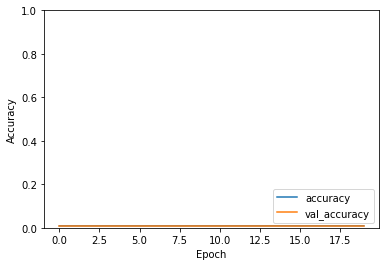

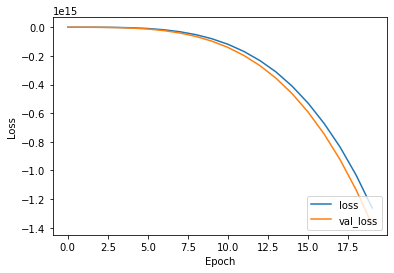

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to load signature images and labels
def load_data(data_dirs):
    images = []
    labels = []
    for data_dir in data_dirs:
        for subdir in os.listdir(data_dir):
            subdir_path = os.path.join(data_dir, subdir)
            if os.path.isdir(subdir_path):
                for image_file in os.listdir(subdir_path):
                    image_path = os.path.join(subdir_path, image_file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image = cv2.resize(image, (128, 128))  # Resize images to a common size
                        images.append(image)
                        labels.append(int(subdir))
    return np.array(images), np.array(labels)

# Define data directories
data_dirs = [
    'archive/BHSig260-Hindi/BHSig260-Hindi',
    'archive/BHSig260-Bengali/BHSig260-Bengali',
    'archive/CEDAR/CEDAR'
]

# Load data
X, y = load_data(data_dirs)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input and normalize
X_train = X_train.reshape(-1, 128, 128, 1).astype('float32') / 255.0
X_val = X_val.reshape(-1, 128, 128, 1).astype('float32') / 255.0

# Data augmentation with reduced intensity
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with augmented data
train_generator = datagen.flow(X_train, y_train, batch_size=32)
history = model.fit(train_generator, epochs=20, validation_data=(X_val, y_val))

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary, average='weighted', zero_division=1)
recall = recall_score(y_val, y_pred_binary, average='weighted')
f1 = f1_score(y_val, y_pred_binary, average='weighted')

print("Validation Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print training history
print(history.history)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


explanation of the code:

Import Libraries: The code imports necessary libraries such as NumPy, scikit-learn, TensorFlow, OpenCV, and Matplotlib.
Load Data Function: Defines a function load_data to load signature images and labels from specified directories. It reads images, resizes them to 128x128 pixels, and stores them along with their labels.
Data Directories: Specifies the directories containing the signature image datasets.
Load Data: Calls the load_data function to load images and labels from the specified directories.
Data Splitting: Splits the dataset into training and validation sets using a 80-20 split.
Data Preprocessing: Reshapes the data for CNN input and normalizes pixel values to a range of [0, 1].
Data Augmentation: Uses ImageDataGenerator to perform data augmentation on the training set, which includes random rotations, shifts, shearing, zooming, and horizontal flipping.
Model Architecture: Defines a CNN model using Sequential API with three convolutional layers followed by max pooling, dropout layers for regularization, and two dense layers for classification.
Compile Model: Compiles the model using the Adam optimizer with a learning rate of 0.0001 and binary cross-entropy loss.
Fit Model: Fits the model to the augmented training data for 20 epochs, using the validation data for evaluation.
Evaluate Model: Evaluates the model on the validation set and computes metrics such as accuracy, precision, recall, and F1-score.
Print and Plot Results: Prints the evaluation metrics and plots the training history (accuracy and loss over epochs) using Matplotlib.
The warning messages we see are related to how certain layers are being initialized or how data adapters are being used. They are informational and don't affect the functionality of the code. Overall, the code demonstrates how to build, train, and evaluate a CNN model for signature recognition using TensorFlow and Kera